---
---

<h1><center><ins>Exercise Sheet 6</ins></center></h1>
<h2><center>Numerical Methods <br>

---
---

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import log

## Exercise 1 - Radioactive decay

Radioactive decay is the process by which an unstable atomic nucleus loses energy by radiation. The fundamental law of radioactive decay is based on the fact that the decay, i.e. the transition of a parent nucleus to a daughter nucleus is a purely statistical process. The disintegration (decay) probability is a fundamental property of an atomic nucleus and remains equal in time. Mathematically this law is expressed as: 

$$ \frac{d N}{dt} = - \lambda N \ , $$

where $N$ is the number of radioactive nuclei, $dN/dt$ the variation of this number per unit of time, and $\lambda$ is thus the probability of decay per nucleus per unit of time. A more intuitive representation of exponential decay is the time required for the decaying quantity to fall to one half of its initial value. This time, $t_{1/2}$, is called "half-life", and can be written in terms of the decay constant as:

$$ t_{1/2} = \frac{\ln(2)}{\lambda} \ . $$

Let's consider here Carbon-14, for which the decay constant is $\lambda \sim 1.21 \times 10^{-4}$ $\text{yr}^{-1}$, and which has a half-life $t_{1/2} \sim 5728$ yr. Its presence in organic materials is the basis of the radiocarbon dating method to date archaeological, geological and hydrogeological samples.

**(A)** Implement _**your own version**_ of the **Euler and Runge Kutta (order 2) algorithms**, and solve the differential equation above by using these methods. Compare the results you obtain to the analytic solution, which can be calculated as:

$$ N = N_0 \exp(-\lambda t) \ ,$$

where $N_0$ is the initial amount of the nuclei $[\text{i.e.}$ $N(t = 0) = N_0]$.

**(B)** Compute your solution for a sufficient number of steps so that you can determine the **half-life** of Carbon-14. Pay attention to the size of the time-step you are using, and discuss your results when using different time-steps. Which method recovers a value of the half-life that is closer to the real one?

true half life: 5728.489095536738
Euler: 5725.511537311963
Runge Kutta: 5727.00107606766


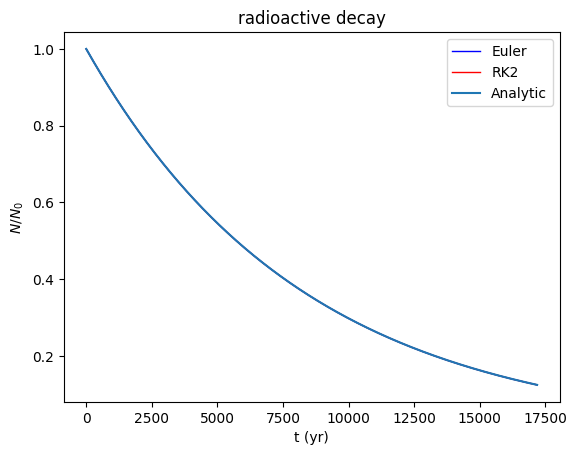

In [ ]:
lamb = 1.21 * 10**(-4) # yr^-1
halflife = log(2)/lamb


def euler(N0, lam, t_max, steps):
    # set up array for N
    dt = t_max/steps
    t = np.linspace(0, t_max, steps+1)
    N = np.zeros_like(t)
    N[0] = N0

    for i in range(steps):
        N[i+1] = N[i] + dt * (-lam * N[i]) # y_n+1 = y_n + delta_t * f_n
    return t, N


def rk2(N0, lam, t_max, steps):
    dt = t_max/steps
    t = np.linspace(0, t_max, steps+1)
    N = np.zeros_like(t)
    N[0] = N0
    for i in range(steps):
        k1 = -lam * N[i]

        N_mid = N[i] + (dt/2) * k1
        k2 = -lam * N_mid

        N[i+1] = N[i] + dt/2 * (k1 + k2)
    return t, N


def estimate_half_life(t, N):
    half = N0 / 2
    idx = np.where(N <= half)[0] # array of indices that have smaller than "half"
    i = idx[0]
    # interploation
    t1, N1 = t[i-1], N[i-1]
    t2, N2 = t[i], N[i]
    frac = (N1 - half) / (N1 - N2)
    return t1 + frac * (t2 - t1)


steps = 2000 # for smaller values the difference between the methods is visible
t_max = 3 * halflife
N0 = 1


t_e, N_e = euler(N0, lamb, t_max, steps)
t_rk, N_rk = rk2(N0, lamb, t_max, steps)
N_an = N0 * np.exp(-lamb * t_e)

print("true half life:", halflife)
print("Euler:", estimate_half_life(t_e, N_e))
print("Runge Kutta:", estimate_half_life(t_rk, N_rk)) # closer to the true half life

# Plot
plt.plot(t_e, N_e, color="blue", markersize=3, linewidth=1, label="Euler")
plt.plot(t_rk, N_rk, color="red", markersize=3, linewidth=1, label="RK2")
plt.plot(t_e, N_an, label="Analytic")
plt.legend()
plt.xlabel("t (yr)")
plt.ylabel("$N/N_0$")
plt.title("radioactive decay")
plt.show()


## Exercise 2 - The motion of a pendulum

The differential equation describing the motion of a simple pendulum of length $l$ is

$$ \frac{d^2 \theta}{dt} = - \frac{g}{l} \sin(\theta) \ , $$

where $g$ is the local acceleration of gravity (on Earth, $g = 9.8$ m/s$^2$). For this exercise, consider $l = 10$ m. Here we will consider the simple case in which the maximal displacement of the pendulum is small, so that we can use the approximation $\sin(\theta) \approx \theta$ and consider the following, simplified, equation:

$$ \frac{d^2 \theta}{dt} = - \frac{g}{l} \theta \ . $$

This equation can be solved analytically, giving the following expression for $\theta(t)$:

$$ \theta(t) = \theta_0 \cos \left(\sqrt{\frac{g}{l}} \, t \right) \ .$$

**(A)** Rewrite the above differential equation as a system of first-order differential equations, and solve it numerically by implementing _**your own version**_ of the **Euler method**. Consider that at a time $t = 0$ the pendulum is at $\theta = 0.1$ radians, and it is not moving. 

**(B)** What is the displacement ($\theta$) of the pendulum at a time $t = 20$ s, if you consider a time step $\tau = 0.2$ s in your ODE integrator? How different is the value you obtain from the true one (calculated with the above equation)? How small should the time step be, if you want to have a discrepancy of at most 0.01 in the value of $\theta(t = 20$ s$)$?

**(C)** Implement _**your own version**_ of the **Euler-Cromer and Runge Kutta (order 4) algorithms**, and solve the differential equation again by using these methods. How big is the discrepancy from the real solution for these methods, at a time $t = 20$ s, if you consider a time step $\tau = 0.2$ s?

In [ ]:
g, l = 9.8,10

theta0 = 0.1  # initial angle, rad
omega0 = 0.0  # initial angular velocity
t_max = 20.0  # total time
tau = 0.2     # time step


# Part (A) - Euler method
def euler(dt):
    steps = int(t_max / dt) +1
    time = np.linspace(0, t_max, steps)
    theta = np.zeros_like(time)
    omega = np.zeros_like(time)
    
    theta[0] = theta0
    omega[0] = omega0
    
    # first order ODE: (I) dtheta/dt = omega, (II) domega/dt = -g/l * theta
    for i in range(steps-1):
        theta[i+1] = theta[i] + dt * omega[i] # I
        omega[i+1] = omega[i] - dt * (g/l) * theta[i] # II
        
    return time, theta

# Part (C) - Euler-Cromer method
def euler_cromer(dt):
    steps = int(t_max / dt) +1
    time = np.linspace(0, t_max, steps)
    theta = np.zeros_like(time)
    omega = np.zeros_like(time)
    
    theta[0] = theta0
    omega[0] = omega0
    
    for i in range(steps-1):
        omega[i+1] = omega[i] - dt * (g/l) * theta[i]
        theta[i+1] = theta[i] + dt * omega[i+1]
        
    return time, theta

# Part (C) - Runge-Kutta 4 method
def runge_kutta4(dt):
    steps = int(t_max / dt) +1
    time = np.linspace(0, t_max, steps)
    theta = np.zeros_like(time)
    omega = np.zeros_like(time)
    
    theta[0] = theta0
    omega[0] = omega0
    
    for i in range(steps-1):
        # k1
        k1_theta = dt * omega[i]
        k1_omega = dt * (-g/l * theta[i])
        
        # k2
        k2_theta = dt * (omega[i] + 0.5*k1_omega)
        k2_omega = dt * (-g/l * (theta[i] + 0.5*k1_theta))
        
        # k3
        k3_theta = dt * (omega[i] + 0.5*k2_omega)
        k3_omega = dt * (-g/l * (theta[i] + 0.5*k2_theta))
        
        # k4
        k4_theta = dt * (omega[i] + k3_omega)
        k4_omega = dt * (-g/l * (theta[i] + k3_theta))
        
        # Update
        theta[i+1] = theta[i] + (k1_theta + 2*k2_theta + 2*k3_theta + k4_theta)/6
        omega[i+1] = omega[i] + (k1_omega + 2*k2_omega + 2*k3_omega + k4_omega)/6
        
    return time, theta


time_e, theta_e = euler(tau)
time_ec, theta_ec = euler_cromer(tau)
time_rk4, theta_rk4 = runge_kutta4(tau)

# Analytical value at t = 20 s
theta_true = theta0 * np.cos(np.sqrt(g/l) * t_max)

print(f"(A,C)\nEuler: {theta_e[-1]:.6f}, Error: {abs(theta_e[-1] - theta_true):.6f}")
print(f"Euler-Cromer: {theta_ec[-1]:.6f}, Error: {abs(theta_ec[-1] - theta_true):.6f}")
print(f"Runge-Kutta 4: {theta_rk4[-1]:.6f}, Error: {abs(theta_rk4[-1] - theta_true):.6f}")
print(f"Analytical: {theta_true:.6f}")

# step size needed for an error of 0.01 (euler)
tolerance = 0.01
dt = 0.2
while dt > 1e-5:
    time, theta_num = euler(dt)
    error = abs(theta_num[-1] - theta_true)
    if error < tolerance:
        break
    dt /= 1.0005 # reduce dt

print(f"\n(B)\nTime step needed for error < {tolerance}: dt = {dt:.6f}")
print(f"Euler: θ({t_max}s) = {theta_num[-1]:.6f}\nError = {error:.6f}")

(A,C)
Euler: 0.524507, Error: 0.466293
Euler-Cromer: 0.047270, Error: 0.010944
Runge-Kutta 4: 0.058232, Error: 0.000018
Analytical: 0.058214

(B)
Time step needed for error < 0.01: dt = 0.015760
Euler: θ(20.0s) = 0.068182
Error = 0.009968


## Exercise 3 - Motion of a mass attached to a spring

The differential equation describing the motion of a particle attached to a spring can be obtained by putting together Newton's 2nd law and Hooke's law, and it can be written as:

$$ \frac{d^2 x}{dt^2} = - \frac{k}{m} x \ , $$

where $m$ is the mass of your particle, $k$ is the spring constant, and $x$ is the displacement from the equilibrium position.

**(A)** Choose some reasonable values for $k$ and $m$, define the initial conditions of your problem, and compute the analytic solution of your specific system, considering that the general solution is given by:

$$ x(t) = x_0 \cos\left(\sqrt{\frac{k}{m}} \, t\right) + v_0 \sqrt{\frac{m}{k}} \sin \left(\sqrt{\frac{k}{m}} \, t\right) \ , $$

where $x_0$ and $v_0$ are the position and velocity of the particle at time $t = 0$.

**(B)** Rewrite the above differential equation as a system of first-order differential equations, and solve it numerically _**by using one of the built-in python methods**_ (take a look at the available methods in the `scipy` package).

**(C)** Plot your solution and compare it to the analytical solution.

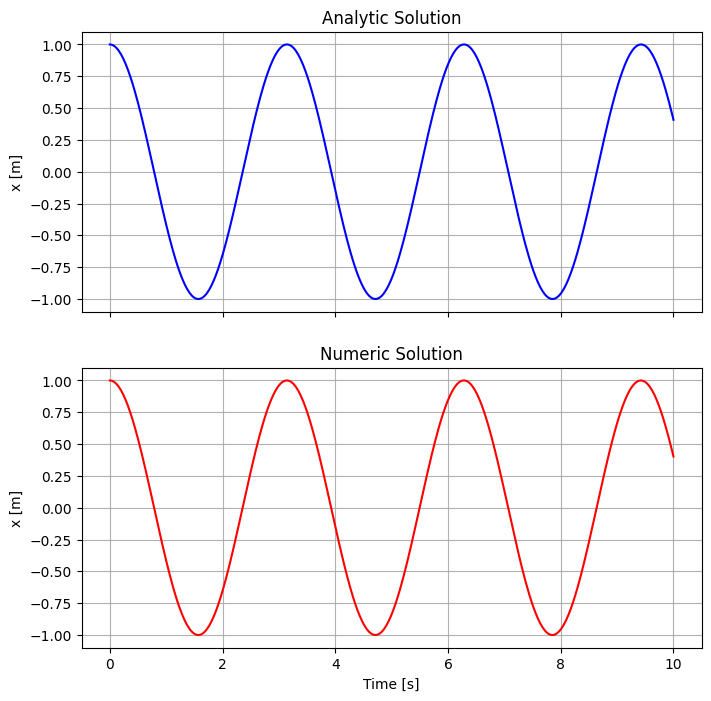

In [41]:
from scipy.integrate import solve_ivp

m = 1.0
k = 4.0
x0 = 1.0
v0 = 0.0
t = np.linspace(0, 10, 500)

# analytic solution
omega = np.sqrt(k/m)
x_analytical = x0 * np.cos(omega * t) + v0/omega * np.sin(omega * t)

# --- (B) numeric solution ---
# y = [x, v], v = dx/dt
def spring_system(t, y):
    x, v = y
    dxdt = v
    dvdt = -k/m * x
    return [dxdt, dvdt]


# initial conditions
y0 = [x0, v0]

sol = solve_ivp(spring_system, [t[0], t[-1]], y0, t_eval=t, method='RK45')

# --- (C) Plot ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# Analytic solution
ax1.plot(t, x_analytical, label='Analytic', linestyle='-', color='blue')
ax1.set_ylabel('x [m]')
ax1.set_title('Analytic Solution')
ax1.grid(True)


# Numeric solution
ax2.plot(sol.t, sol.y[0], label='Numeric', linestyle='-', color='red')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('x [m]')
ax2.set_title('Numeric Solution')
ax2.grid(True)

plt.show()